In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

from scipy.integrate import quad
from numpy.linalg import matrix_power
from numpy import linalg as LA

In [76]:
def make_figure(D,C):
    P = C.shape[0]; N = C.shape[1];
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    for i in range(N):
        plt.plot(np.diag(D))
    plt.title('$\lambda_i$')
    plt.ylabel('eigenvalues')

    plt.subplot(1,2,2)
    for i in range(P):
        plt.plot(C[i,:], '^', color=[0,(1/P)*i,(1/P)*i])
        plt.plot(C[i,:], color=[0,(1/P)*i,(1/P)*i])
    plt.title('$\hat{\lambda}_i$')
    plt.show()

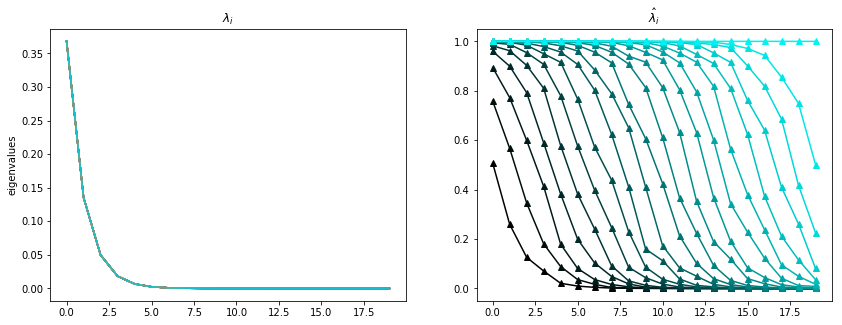

In [81]:
N = 20
D = np.diag(np.exp(-np.linspace(1,N,N))) #the eigenvalues of the feature covariance matrix

num_trials = 100

P = 20
C = np.zeros((P,N))

for P_temp in range(P): 
    P_in = P_temp + 1
    for it in range(num_trials):
        W = np.random.normal(0,1,size=(N,P_in))
        B = np.linalg.inv(np.matmul(np.matmul(W.T,D), W))
        for i in range(N):
            C[P_temp, i] += D[i,i] * np.inner(W[i,:], np.matmul(B, W[i,:]))

    C[P_temp, :] = C[P_temp, :] / num_trials 
make_figure(D,C)